In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import timedelta
plt.style.use('ggplot')
% matplotlib inline
import os

In [3]:
def load_dataframe(fname):
    with open(fname) as f:
        raw = json.load(f)
    for i in range(len(raw['stats'][0])):
        raw["mean_%d" % i] = [x[i][0] for x in raw['stats']]
        raw["std_%d" % i] = [x[i][1] for x in raw['stats']]
    raw["mean_agg"], raw["mean_std"] = zip(*[np.mean(x, axis=0) for x in raw['stats']])
    df = pd.DataFrame(data=raw)
    return df

# Hyperparam sweep - Synchronization, ADAM, Number of Models

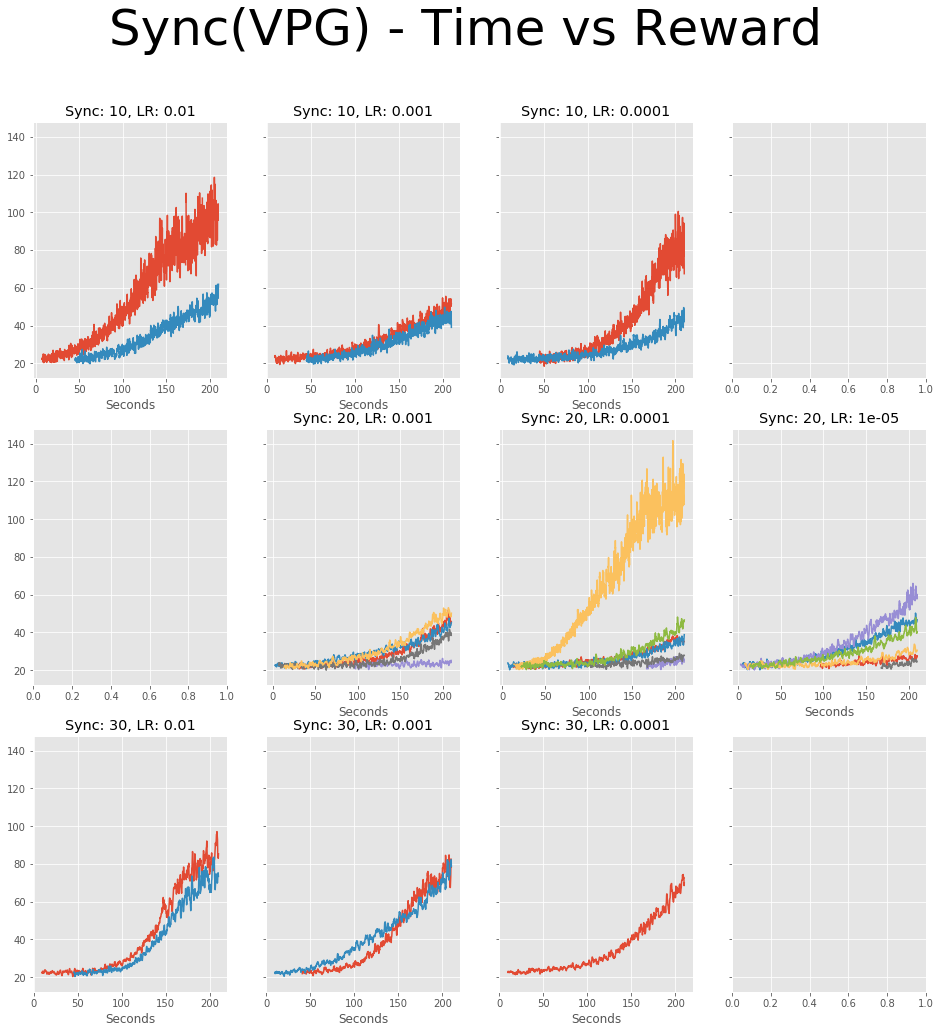

In [4]:
fig, axes = plt.subplots(3, 4 ,figsize=(16,16), sharey=True)
fig.suptitle("Sync(VPG) - Time vs Reward", fontsize=50)
for j, sync in enumerate([10, 20, 30]):
    for i, lr in enumerate(["0.01", "0.001", "0.0001", "1e-05"]):
        paths = [os.path.join(x[0], y) for x in os.walk("./e2w6_lr{0}_sync{1}/".format(lr, sync)) for y in x[-1] ]
        for fname in paths:
            df = load_dataframe(fname)
            m = df['mean_agg'].rolling(5, ).mean()
            axes[j][i].plot(df['TS'], m)
            axes[j][i].set_title("Sync: %d, LR: %s" % (sync, lr))
    #         m.plot(xticks=df['TS'], ax=axes[i], title=adam)
    #         print(str(timedelta(seconds=df["TS"].max())))
#             axes[j][i].set_xlim([0, 150])
            axes[j][i].set_xlabel("Seconds")

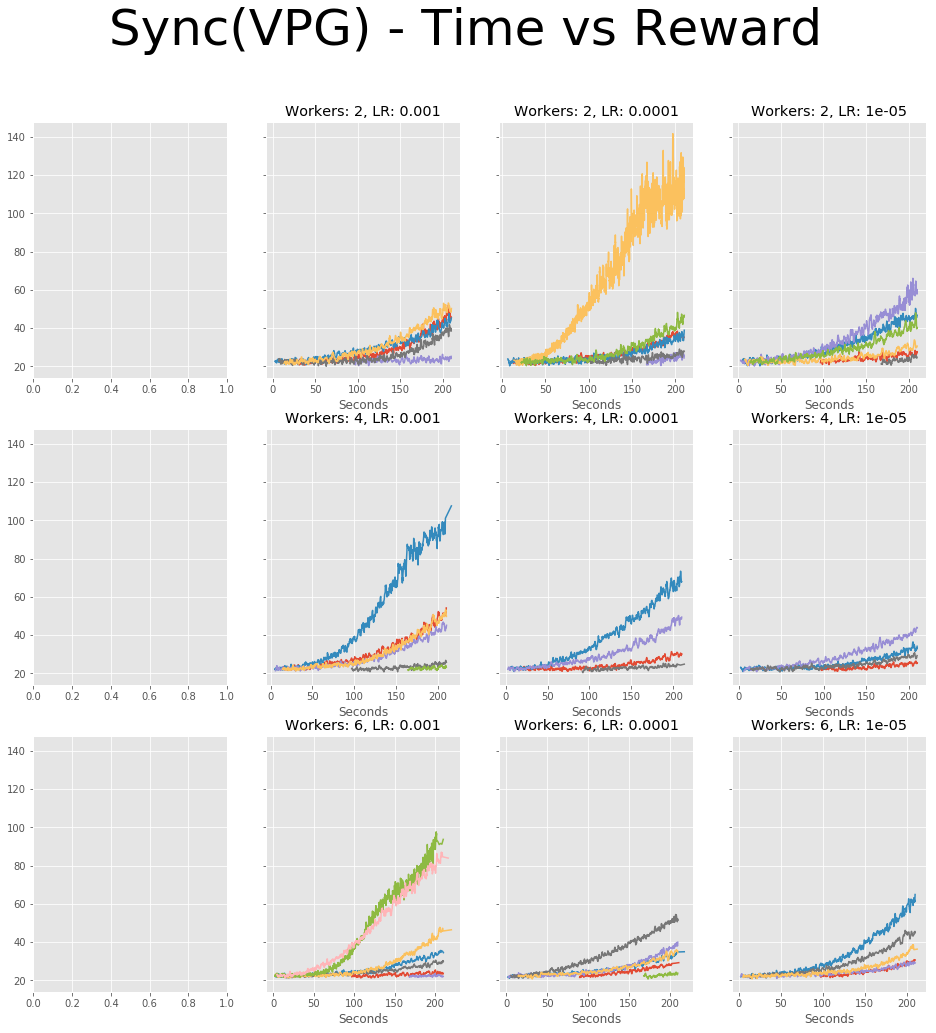

In [11]:
fig, axes = plt.subplots(3, 4 ,figsize=(16,16), sharey=True)
fig.suptitle("Sync(VPG) - Time vs Reward", fontsize=50)
for j, exp in enumerate([2, 4, 6]):
    for i, lr in enumerate(["0.01", "0.001", "0.0001", "1e-05"]):
        paths = [os.path.join(x[0], y) for x in os.walk("./e{0}w6_lr{1}_sync20/".format(exp, lr)) for y in x[-1] ]
        for fname in paths:
            df = load_dataframe(fname)
            m = df['mean_agg'].rolling(5, ).mean()
            axes[j][i].plot(df['TS'], m)
            axes[j][i].set_title("Workers: %d, LR: %s" % (exp, lr))
    #         m.plot(xticks=df['TS'], ax=axes[i], title=adam)
    #         print(str(timedelta(seconds=df["TS"].max())))
#             axes[j][i].set_xlim([0, 150])
            axes[j][i].set_xlabel("Seconds")

In [20]:
! ls e2w6_lr1e-05_sync20/20170416_08_07_374786.json

e2w6_lr1e-05_sync20/20170416_08_07_374786.json


In [29]:
df = load_dataframe("./e4w6_lr0.001_sync20/20170416_08_10_844537.json")

In [8]:
! tail -n 50 ../hyperparam.py

    for repeat in range(3):
        for num_models in [2, 4, 6]:
            for learning_rate in [10**(-x) for x in range(3, 6)]:
                all_experiments.append(run_multimodel_experiment.remote(num_models, runners, sync, learning_rate))

        while len(all_experiments) > 4:
            print("waiting...{}".format(len(all_experiments)))
            print(time_string())
            done, all_experiments = ray.wait(all_experiments)
            results = ray.get(done)[0]
            x = ray.error_info()
            print(x)
            save_results(results)
    while len(all_experiments):
        print("waiting...{}".format(len(all_experiments)))
        print(time_string())
        done, all_experiments = ray.wait(all_experiments, timeout=1e5)
        results = ray.get(done)[0]
        save_results(results)



if __name__ == '__main__':
    parser = argparse.ArgumentParser(description="Run the multi-model learning example.")
    # parser.add_argument("--num-experiments", defau